In [52]:
import torch
from torchvision import transforms
from torchvision import datasets

In [53]:
data_path = '/home/youhyeok/Documents/data/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [54]:
imgs = torch.stack([img_t for img_t, _ in cifar10], dim=3)

In [55]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [56]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [57]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]))

In [58]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
            for img, label in cifar10
            if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [59]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [60]:
x = torch.tensor([1.0, 2.0, 3.0])

In [61]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [62]:
softmax(x).sum()

tensor(1.)

In [63]:
import torch.nn as nn

In [64]:
softmax = nn.Softmax(dim=1)

In [65]:
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])

In [66]:
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [67]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

In [68]:
img, _ = cifar2[0]

In [69]:
from matplotlib import pyplot as plt

In [70]:
img.shape

torch.Size([3, 32, 32])

In [71]:
img.view(3, -1).mean(dim=1)

tensor([-0.0758,  0.4824, -0.4269])

In [72]:
img.view(3, -1).std(dim=1)

tensor([0.6773, 0.7743, 0.6886])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


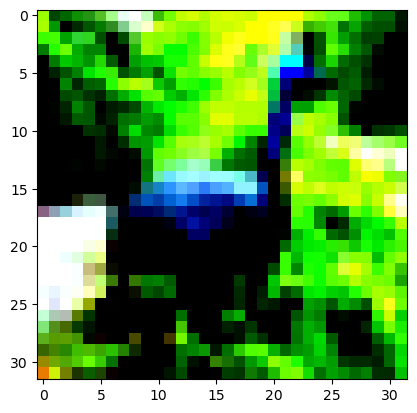

In [73]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [74]:
img_batch = img.view(-1).unsqueeze(0)

In [92]:
img_batch.shape

torch.Size([1, 3072])

In [93]:
out = model(img_batch)

In [94]:
out

tensor([[0.5408, 0.4592]], grad_fn=<SoftmaxBackward0>)

In [95]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [ ]:
learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))